In [1]:
import pandas as pd

%store -r t

data = pd.read_csv('./fakeData/labelledDataSOM' + t + '.csv')
# X = data[['valueLog','sex', 'marketing','moveFreq', 'premsFreq', 'premsMedian','traceability']].to_numpy()
# X = data[['perno', 'sex', 'latitude', 'long', 'valueLog',
#    'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
#    'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

X = data[['sex', 'valueLog',
       'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

labels = data['cluster'].to_list()

columnnames = ['sex', 'valueLog',
       'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']

path = './vis'

   sex   valueLog  marketing  moveFreq  moveDur  premsFreq  premsMean  \
0  0.0  12.028720        1.0       1.0   6570.0       58.0    2176.51   
1  2.0   6.565265        0.0       1.0   6570.0        1.0     250.00   
2  0.0  10.322722        0.0       1.0   6570.0      216.0      96.51   
3  2.0   6.565265        1.0       1.0   6570.0        1.0     250.00   
4  2.0  10.020820        1.0       3.0   1822.0        6.0    2810.32   

   premsMax  premsMin  premsMedian  premsDur  traceability  cluster  
0   4615.00    240.74      2124.70     115.0      0.601151      0.0  
1    250.00    250.00       250.00    6570.0      0.819601      1.0  
2    438.05      2.98        86.05      30.0      0.000000      4.0  
3    250.00    250.00       250.00    6570.0      0.000000      1.0  
4   3785.99   1834.52      2805.93    1160.0      0.855215      3.0  


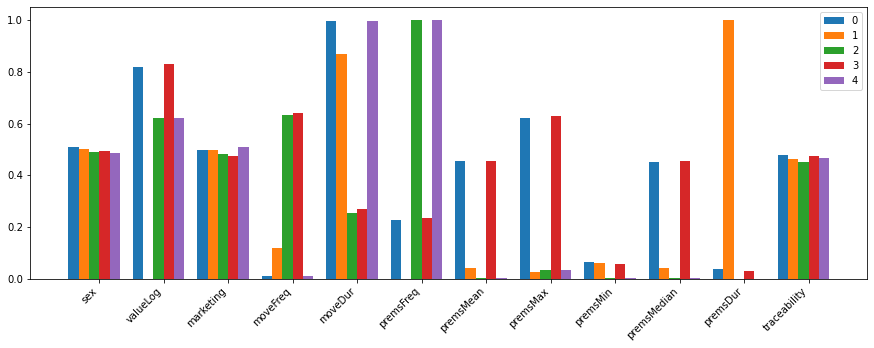

<Figure size 432x288 with 0 Axes>

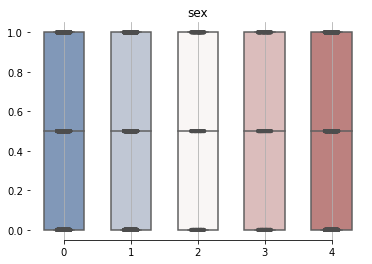

<Figure size 432x288 with 0 Axes>

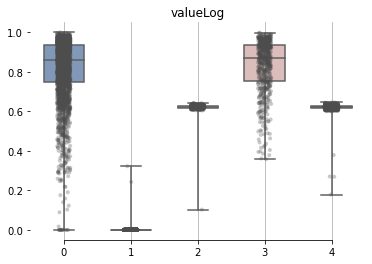

<Figure size 432x288 with 0 Axes>

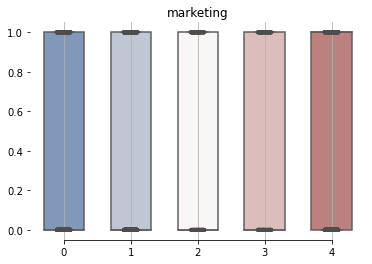

<Figure size 432x288 with 0 Axes>

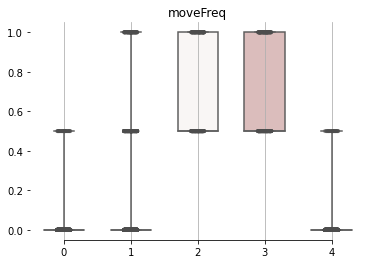

<Figure size 432x288 with 0 Axes>

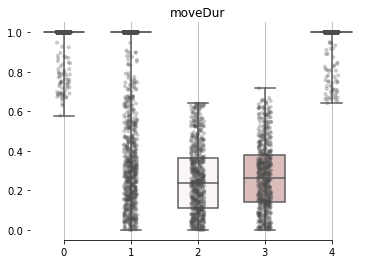

<Figure size 432x288 with 0 Axes>

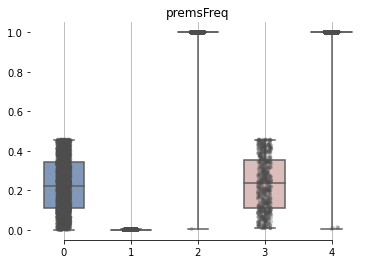

<Figure size 432x288 with 0 Axes>

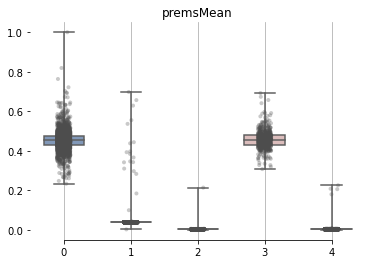

<Figure size 432x288 with 0 Axes>

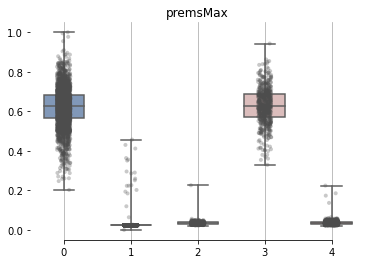

<Figure size 432x288 with 0 Axes>

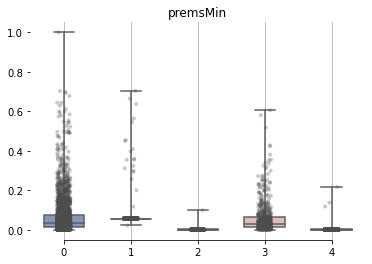

<Figure size 432x288 with 0 Axes>

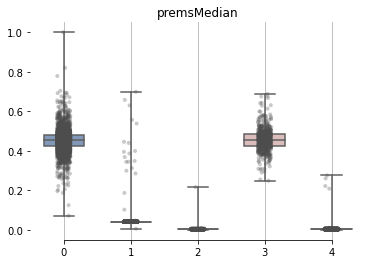

<Figure size 432x288 with 0 Axes>

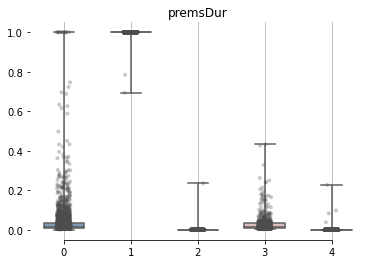

<Figure size 432x288 with 0 Axes>

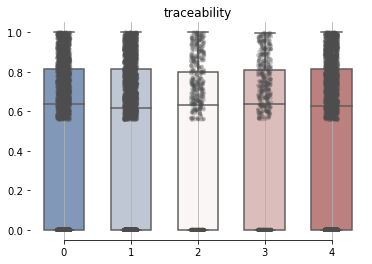

<Figure size 432x288 with 0 Axes>

In [2]:
from module.visual import averageBarchart, boxplot, pltHistwithMeans, pltNormalDistwithMeans, radarClus, parallelClus
from module.validateCluster import clusterSummary, featureImportanceStats

clustersummarydf = clusterSummary(X,columnnames, labels)
averageBarchart(X, labels, columnnames, path, show = True)
boxplot(X,labels, columnnames, path, show = True)

In [3]:
importance = featureImportanceStats(clustersummarydf, max(labels)+1, X)

Statistically
Cluster 0 has relatively high feature premsMean with mean value of 801.480793
Cluster 0 has relatively high feature premsMax with mean value of 1584.953634
Cluster 0 has relatively high feature premsMedian with mean value of 791.983216
Cluster 1 has relatively low feature valueLog with mean value of 9.530657401884108
Cluster 1 has relatively high feature premsDur with mean value of 2222.398
Cluster 2 has relatively high feature moveFreq with mean value of 1.2434
Cluster 2 has relatively low feature moveDur with mean value of 5688.0136
Cluster 2 has relatively high feature premsFreq with mean value of 90.3794
Cluster 3 has relatively high feature moveFreq with mean value of 1.2434
Cluster 3 has relatively low feature moveDur with mean value of 5688.0136
Cluster 3 has relatively high feature premsMean with mean value of 801.480793
Cluster 3 has relatively high feature premsMax with mean value of 1584.953634
Cluster 3 has relatively high feature premsMedian with mean value o

In [4]:
clustersummarydf

,sex,valueLog,marketing,moveFreq,moveDur,premsFreq,premsMean,premsMax,premsMin,premsMedian,premsDur,traceability
0,1.017921,11.528543,0.496774,1.022581,6534.372043,50.025806,2017.308742,4103.671444,276.525047,2000.525656,277.757348,0.429106
1,1.002788,6.566329,0.499690,1.236989,5716.708178,1.000620,259.139647,259.451462,258.827835,259.139647,6568.944548,0.415871
2,0.982258,10.343618,0.480645,2.269355,1683.616129,215.654839,101.003435,321.102403,7.211871,89.343806,32.487097,0.407355
3,0.989933,11.607935,0.474832,2.280201,1787.013423,51.479866,2028.109765,4155.805537,249.481292,2013.043876,232.271812,0.425801
4,0.970354,10.345067,0.508677,1.020246,6538.973970,215.691974,100.736880,320.621873,7.559660,89.188536,31.058568,0.419509


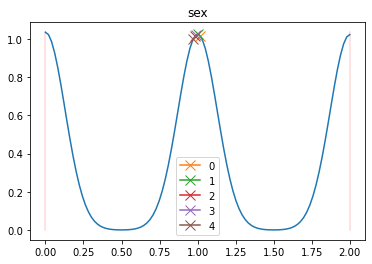

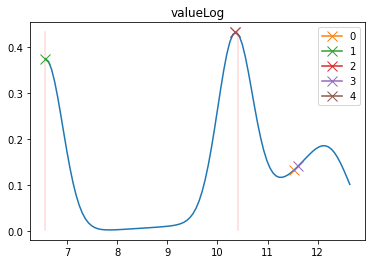

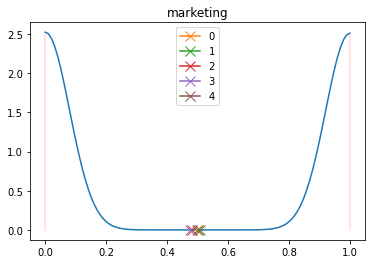

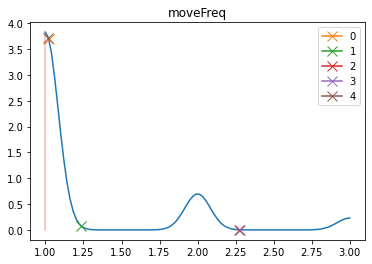

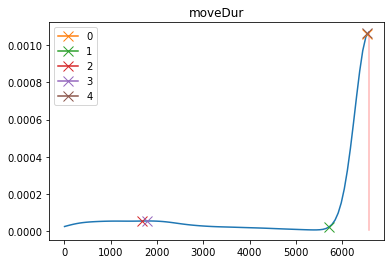

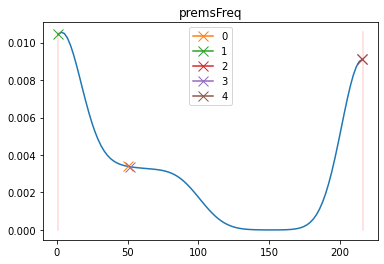

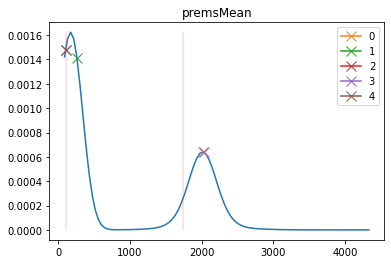

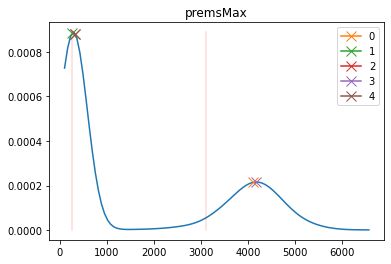

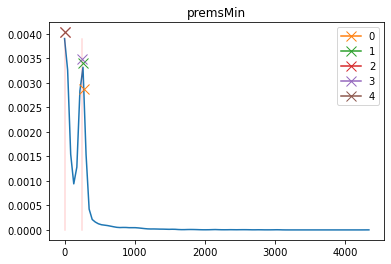

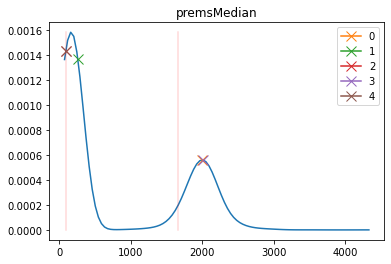

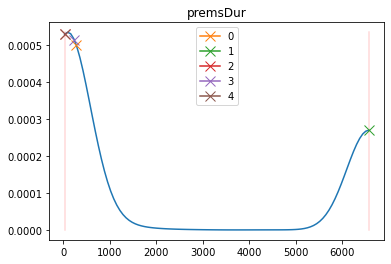

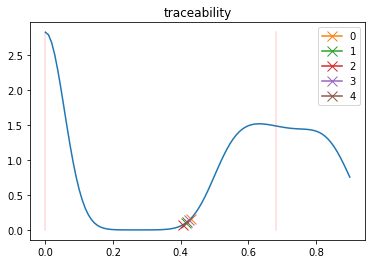

<Figure size 432x288 with 0 Axes>

In [5]:
pltHistwithMeans(clustersummarydf, X, path, show = True)

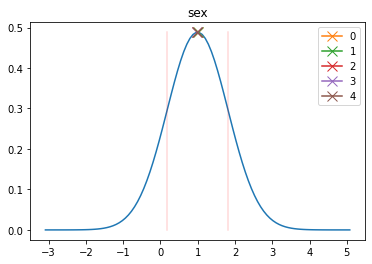

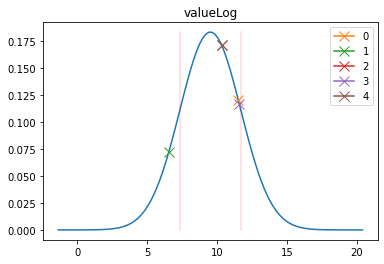

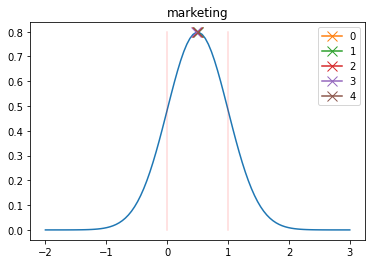

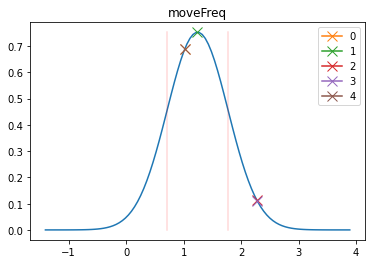

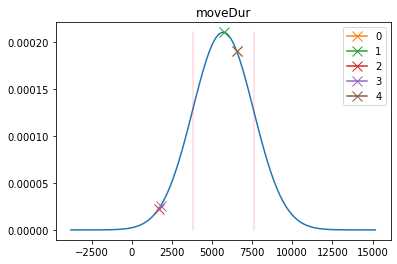

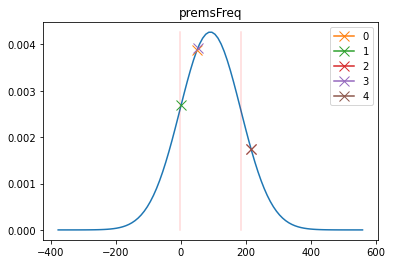

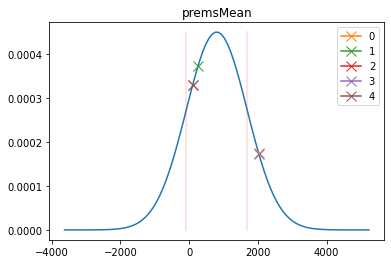

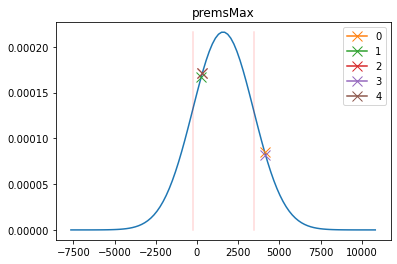

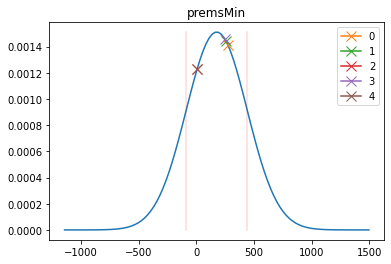

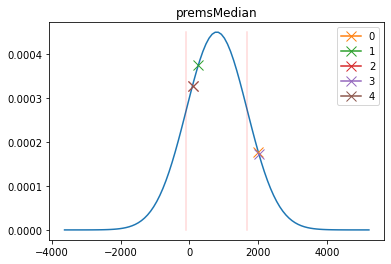

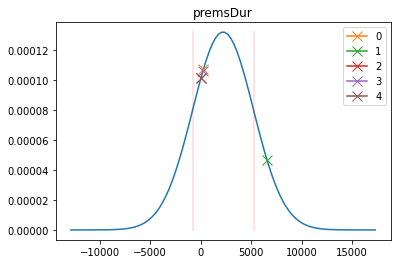

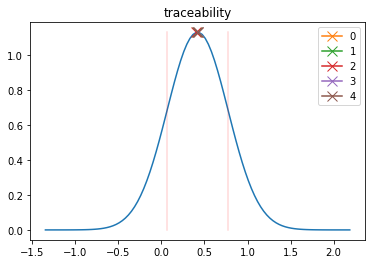

<Figure size 432x288 with 0 Axes>

In [6]:
pltNormalDistwithMeans(clustersummarydf, X, path, show = True)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler 


def parrallelClus(X, labels, columnnames, path, show = False):
    
    x = MinMaxScaler().fit_transform(X)

    i = 0

    plt.figure(figsize=(15, 5))

    for i in range(max(labels)+1):
        x1 = x[np.where(np.array(labels) == i)]
        xmedian = np.array([np.median(col) for col in x1.transpose()])
                  
        plt.plot(xmedian, label = 'Cluster ' +str(i), linewidth = 3, alpha = 0.75)

        xvar = np.array([np.var(col) for col in x1.transpose()])
        plt.fill_between(np.arange(len(xmedian)),xmedian-xvar,xmedian+xvar, alpha = 0.25)
        i+=1

    plt.legend()
    plt.grid(axis = 'x')
    plt.xticks(np.arange(0,len(x[1])),labels = columnnames)
    plt.savefig(path + '/aggregation/radar.png', transparent=False, facecolor='white')
    
    if show == True:
        plt.show()
        
    plt.clf() 

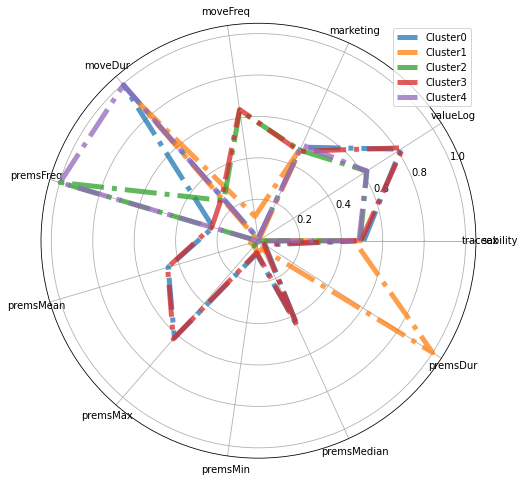

<Figure size 432x288 with 0 Axes>

In [8]:
radarClus(X, labels, columnnames, path, show = True)

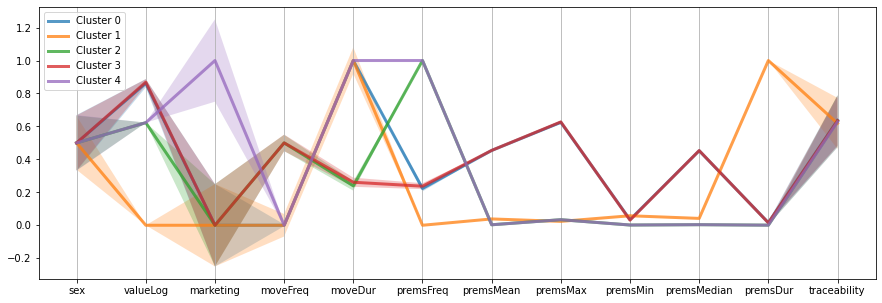

<Figure size 432x288 with 0 Axes>

In [9]:
parallelClus(X, labels, columnnames, path, show = True)

## Gone Aways

In [10]:
ga = data['goneAway'].to_list()
path = './vis/goneAway'

goneawaysummarydf = clusterSummary(X,columnnames, ga)

   sex   valueLog  marketing  moveFreq  moveDur  premsFreq  premsMean  \
0  0.0  12.028720        1.0       1.0   6570.0       58.0    2176.51   
1  2.0   6.565265        0.0       1.0   6570.0        1.0     250.00   
2  0.0  10.322722        0.0       1.0   6570.0      216.0      96.51   
3  2.0   6.565265        1.0       1.0   6570.0        1.0     250.00   
4  2.0  10.020820        1.0       3.0   1822.0        6.0    2810.32   

   premsMax  premsMin  premsMedian  premsDur  traceability  cluster  
0   4615.00    240.74      2124.70     115.0      0.601151      0.0  
1    250.00    250.00       250.00    6570.0      0.819601      0.0  
2    438.05      2.98        86.05      30.0      0.000000      0.0  
3    250.00    250.00       250.00    6570.0      0.000000      0.0  
4   3785.99   1834.52      2805.93    1160.0      0.855215      0.0  


In [11]:
goneawaysummarydf

,sex,valueLog,marketing,moveFreq,moveDur,premsFreq,premsMean,premsMax,premsMin,premsMedian,premsDur,traceability
0,0.998465,9.533261,0.499469,1.241408,5694.497106,90.339908,802.290887,1588.578615,177.910840,792.383794,2222.720090,0.420801
1,0.982387,9.516275,0.494455,1.254403,5652.204175,90.597521,797.006517,1564.932296,179.192616,789.770763,2220.619048,0.419711


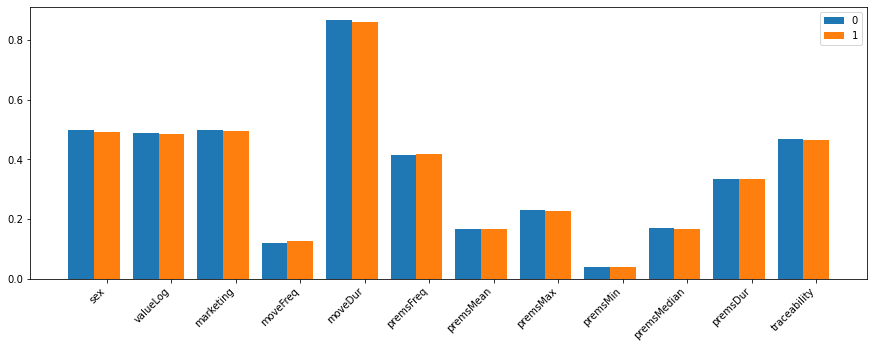

<Figure size 432x288 with 0 Axes>

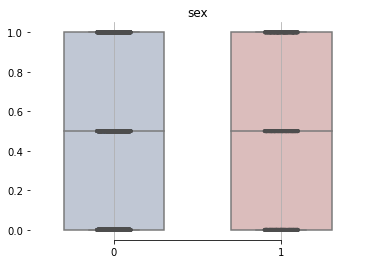

<Figure size 432x288 with 0 Axes>

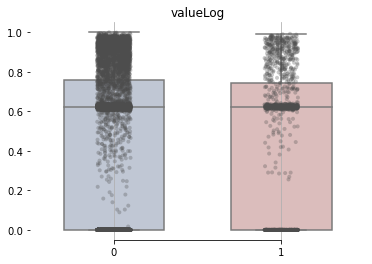

<Figure size 432x288 with 0 Axes>

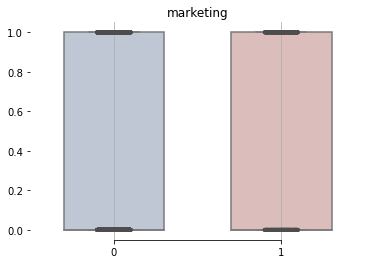

<Figure size 432x288 with 0 Axes>

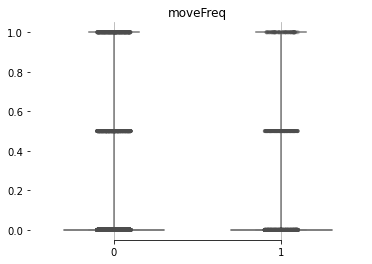

<Figure size 432x288 with 0 Axes>

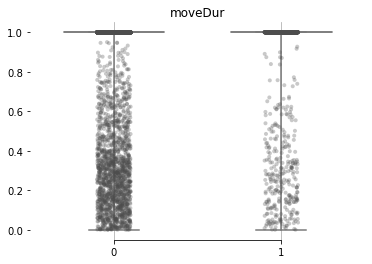

<Figure size 432x288 with 0 Axes>

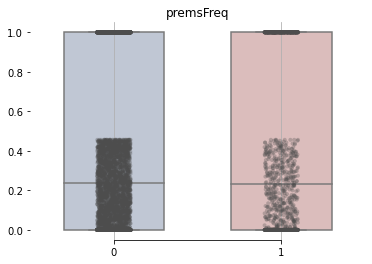

<Figure size 432x288 with 0 Axes>

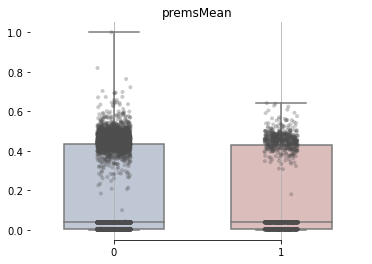

<Figure size 432x288 with 0 Axes>

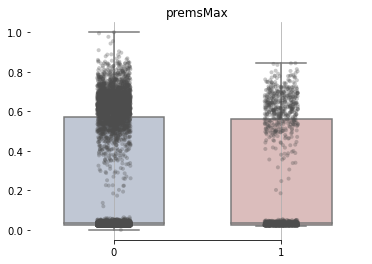

<Figure size 432x288 with 0 Axes>

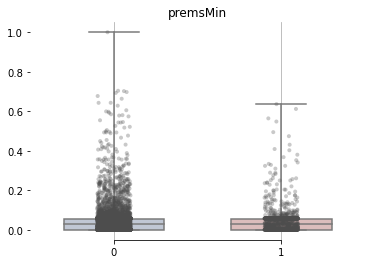

<Figure size 432x288 with 0 Axes>

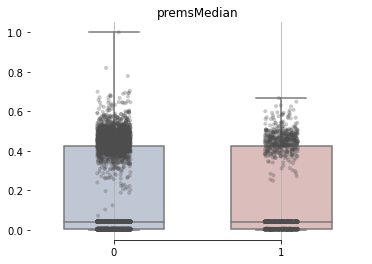

<Figure size 432x288 with 0 Axes>

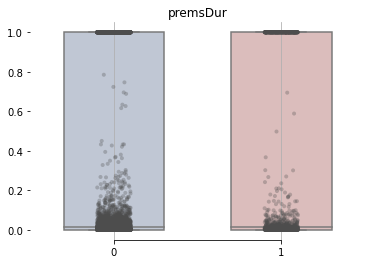

<Figure size 432x288 with 0 Axes>

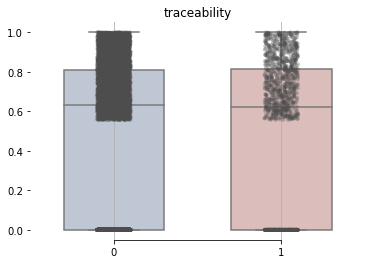

<Figure size 432x288 with 0 Axes>

In [12]:
averageBarchart(X, ga, columnnames, path, show = True)
boxplot(X,ga, columnnames, path, show = True)

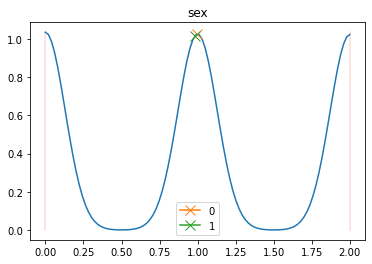

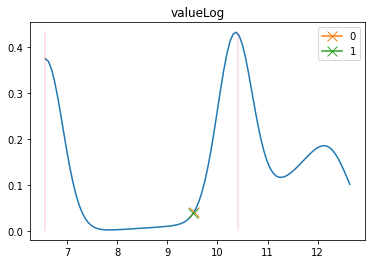

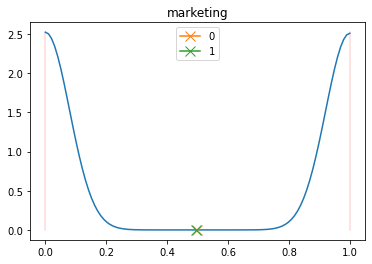

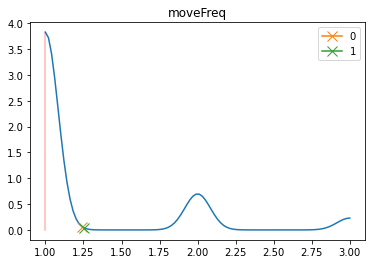

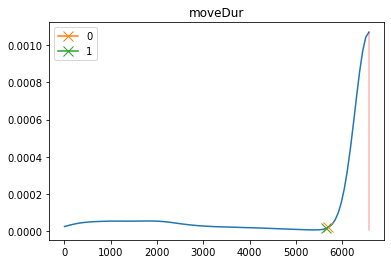

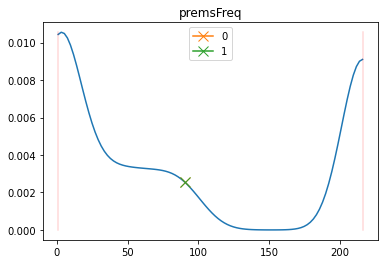

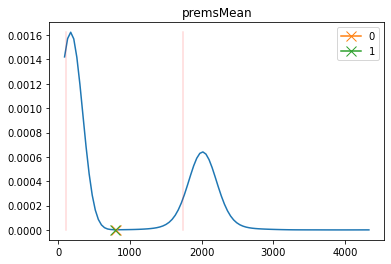

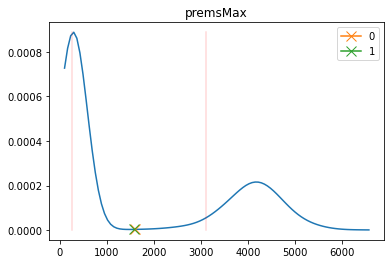

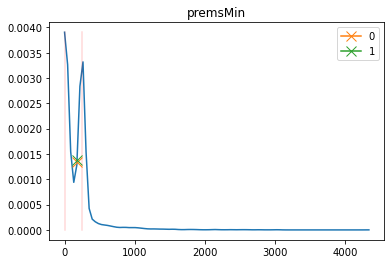

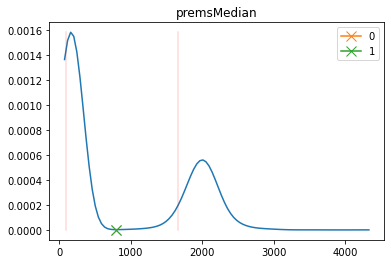

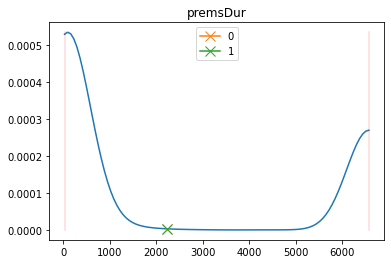

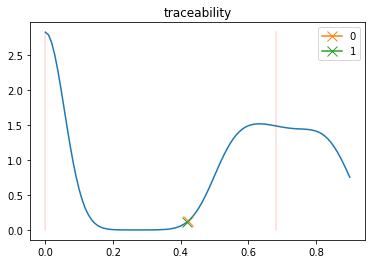

<Figure size 432x288 with 0 Axes>

In [13]:
pltHistwithMeans(goneawaysummarydf, X, path, show = True)

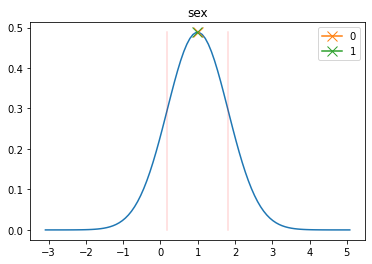

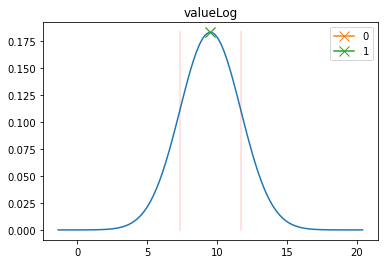

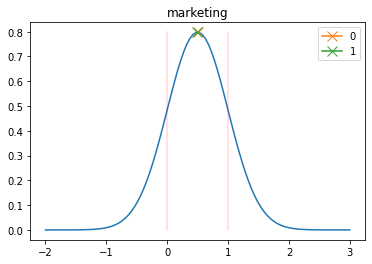

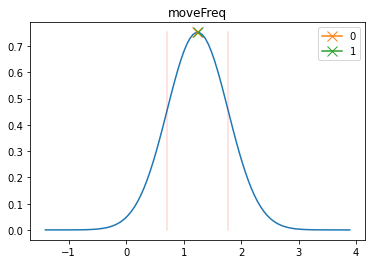

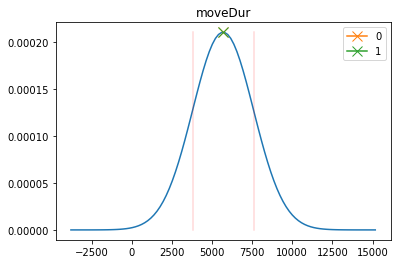

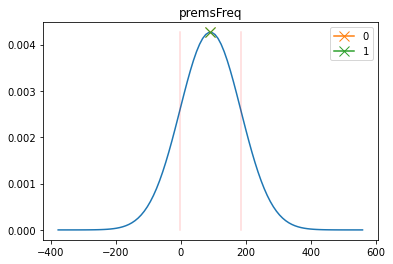

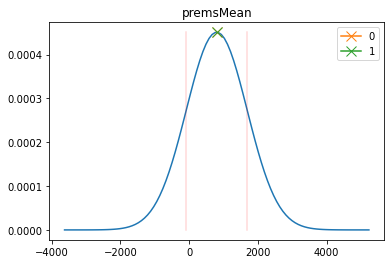

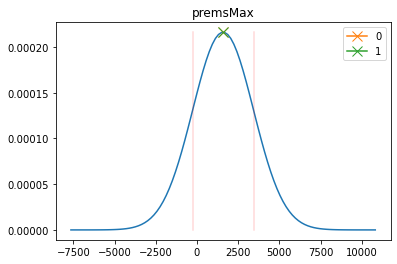

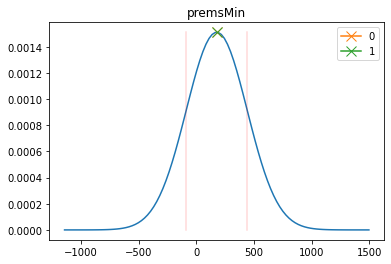

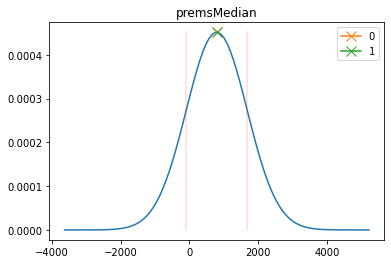

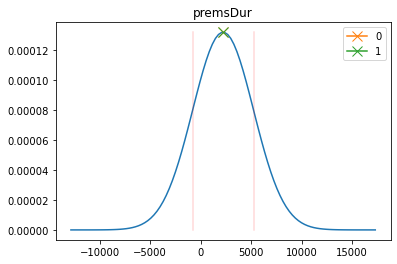

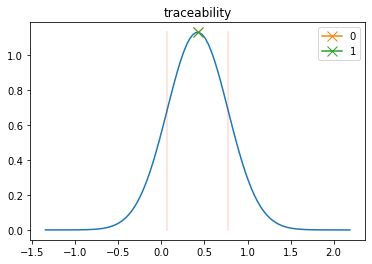

<Figure size 432x288 with 0 Axes>

In [14]:
pltNormalDistwithMeans(goneawaysummarydf, X, path, show = True)

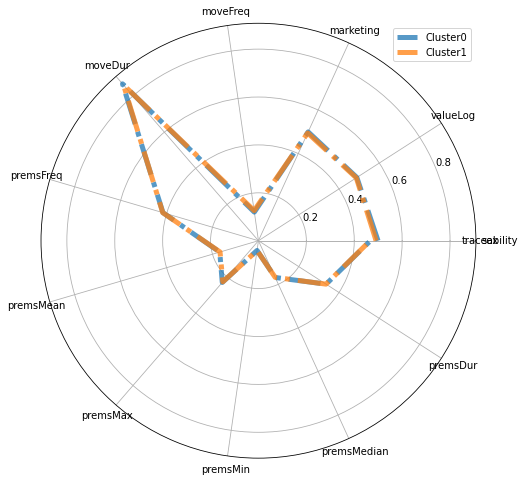

<Figure size 432x288 with 0 Axes>

In [15]:
radarClus(X, ga, columnnames, path, show = True)

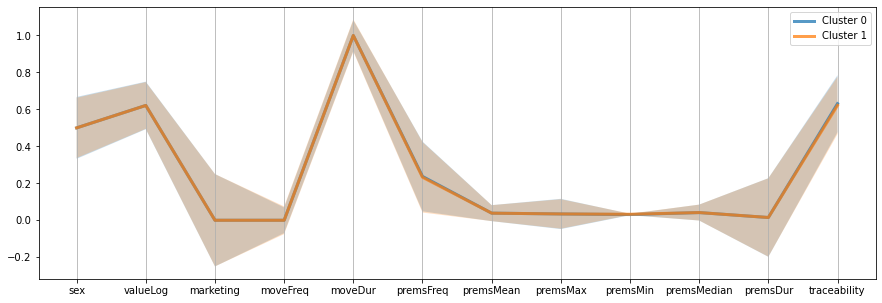

<Figure size 432x288 with 0 Axes>

In [16]:
parallelClus(X, ga, columnnames, path, show = True)